In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
def fetch_data():
    # Adjust the file path as necessary
    return pd.read_excel('C:/Users/Srujana/OneDrive/Desktop/big data/dataset/inference.xlsx')  # Use a raw string for Windows paths

In [4]:
df = fetch_data()

In [5]:
len(df)

2

In [14]:
for i in range(len(df)):    
    print(df['name'].iloc[i])

xyz
Suhas Mohan Kumar


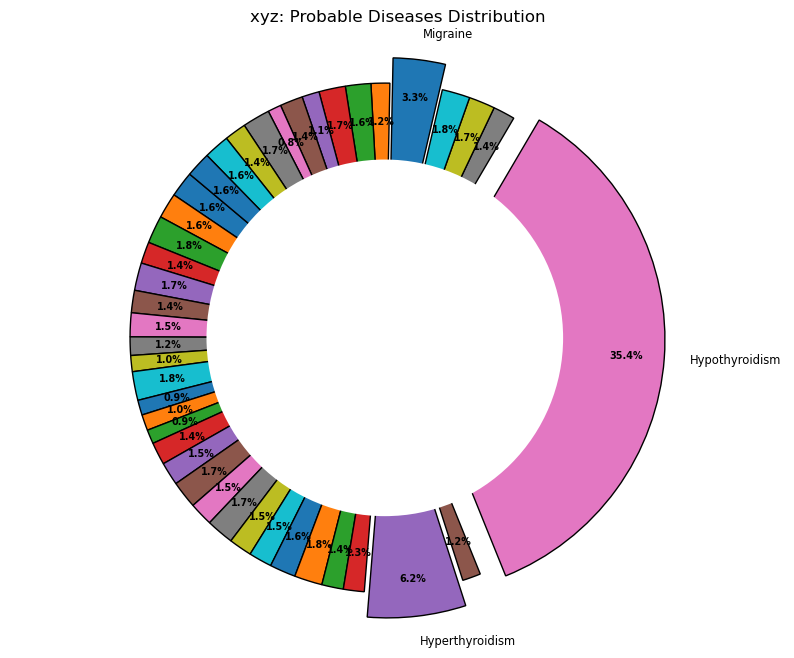

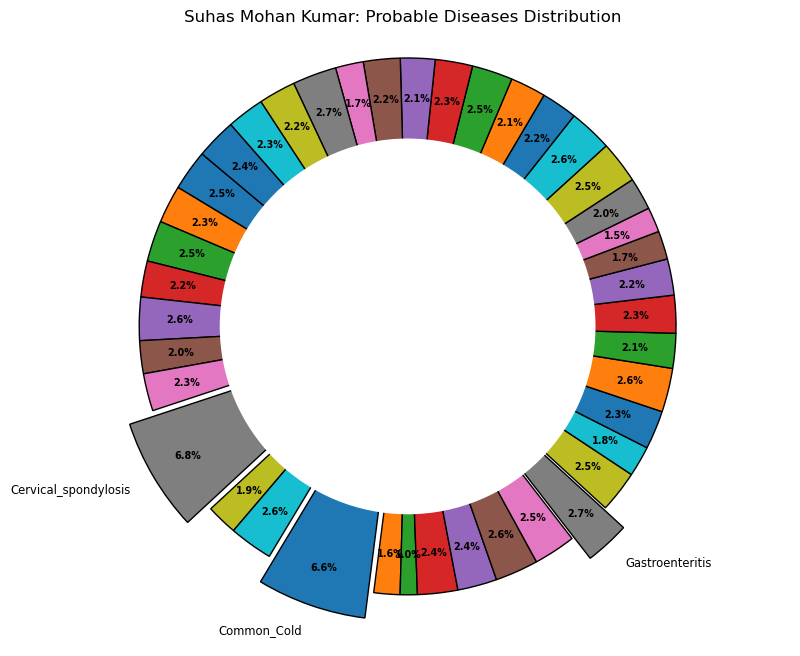

In [17]:
def update_pie_chart():
    data = fetch_data()
    for i in range(len(data)):
        disease_data = data.drop(columns=['name', 'age', 'gender'])
        disease_labels = disease_data.columns
        disease_values = disease_data.iloc[i].values

        # Determine the indices of the top 3 diseases
        top_indices = np.argsort(disease_values)[-3:]  # Get indices of top 3 values

        # Create a labels list with empty strings except for the top 3
        labels = ['' for _ in disease_values]
        for index in top_indices:
            labels[index] = disease_labels[index]

        # Create an explode list to pull the top 3 slices out
        explode = [0.1 if i in top_indices else 0 for i in range(len(disease_values))]

        # Plotting
        plt.figure(figsize=(10, 8))
        wedges, texts, autotexts = plt.pie(disease_values, labels=labels,
                                          autopct='%1.1f%%', startangle=140,
                                          wedgeprops={'edgecolor': 'black'},
                                          pctdistance=0.85, explode=explode)  # Include explode here

        # Draw circle for the Donut chart look and better clarity
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.title(df['name'].iloc[i] + ': Probable Diseases Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # Adjust the position of percentage labels
        plt.setp(autotexts, size='x-small', weight="bold", color="black")
        plt.setp(texts, size='small')

        plt.show()

# Call the function to start updating the pie chart
update_pie_chart()

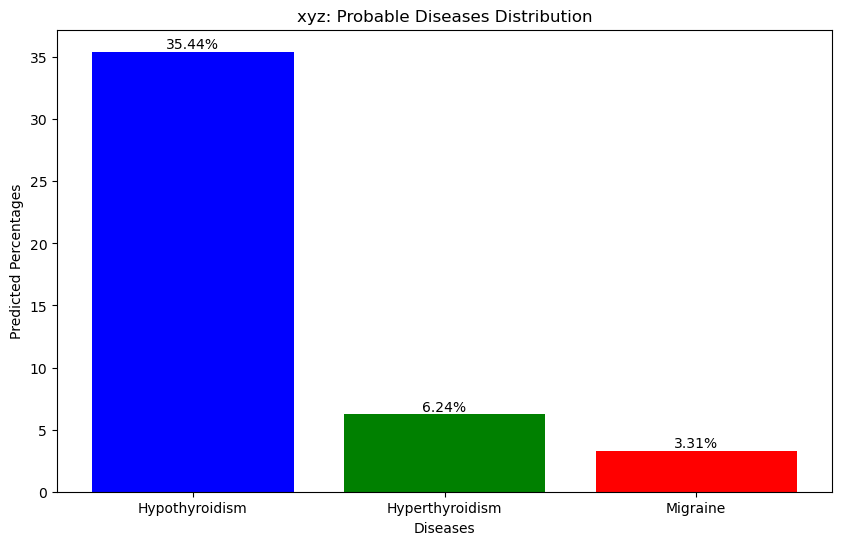

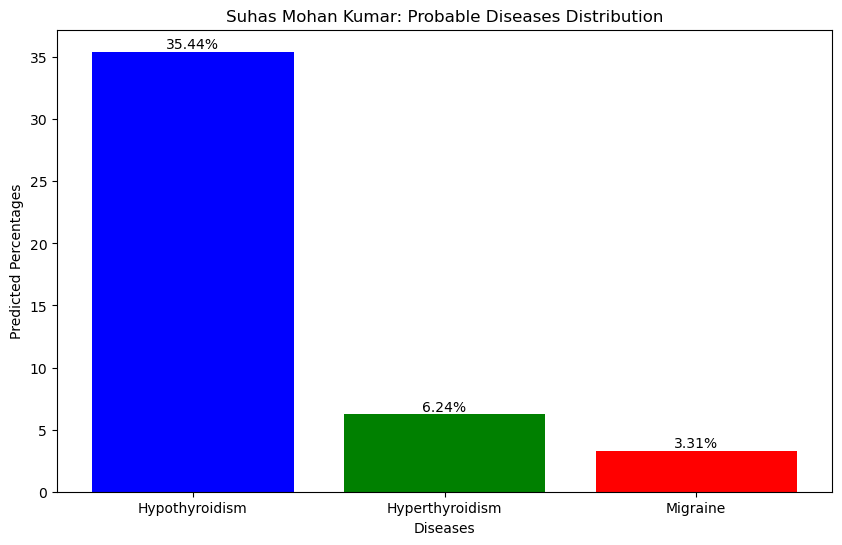

In [18]:
def update_bar_chart():
    data = fetch_data()
    for i in range(len(data)):
        disease_data = data.drop(columns=['name', 'age', 'gender'])
        disease_labels = disease_data.columns
        disease_values = disease_data.iloc[0].values*100

        # Get the indices of the top 3 diseases
        top_indices = disease_values.argsort()[-3:][::-1]
        top_labels = disease_labels[top_indices]
        top_values = disease_values[top_indices]

        # Plotting
        plt.figure(figsize=(10, 6))
        bars = plt.bar(top_labels, top_values, color=['blue', 'green', 'red'])  # Use different colors

        # Adding text labels and values on the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

        plt.title(df['name'].iloc[i] + ': Probable Diseases Distribution')
        plt.xlabel('Diseases')
        plt.ylabel('Predicted Percentages')
        plt.show()
        
# Call the function to start updating the bar chart
update_bar_chart()


In [23]:
# Load your training Excel sheet containing disease-symptom data into a DataFrame
training_df = pd.read_excel('C:/Users/Srujana/OneDrive/Desktop/big data/dataset/training.xlsx')

In [25]:
# Assuming 'Disease' column contains the disease names and the rest of the columns are symptoms
# Group by 'Disease' and sum the symptom columns to get the count of symptoms for each disease
disease_symptoms_grouped = training_df.groupby('prognosis').sum()

# Convert the binary encoded symptoms to binary (0 or 1)
disease_symptoms_grouped = (disease_symptoms_grouped > 0).astype(int)

print(disease_symptoms_grouped)


           itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
prognosis                                                                  
AIDS             0          0                     0                    0   
Acne             0          1                     0                    0   
Allergy          0          0                     0                    1   
Dengue           0          1                     0                    0   
GERD             0          0                     0                    0   
Impetigo         0          1                     0                    0   
Malaria          0          0                     0                    0   
Typhoid          0          0                     0                    0   
vertigo          0          0                     0                    0   

           shivering  chills  joint_pain  stomach_pain  acidity  \
prognosis                                                         
AIDS               0       0 

In [28]:
def generate_symptom_barchart_from_csv(output_csv_path, training_csv_path, symptoms_csv_path):
    # Load data from CSV files
    output_data = pd.read_csv(output_csv_path)
    training_data = pd.read_csv(training_csv_path)
    symptoms_data = pd.read_csv(symptoms_csv_path)
    training_data = training_data.iloc[:, :-1]
 
    # Get top 3 diseases based on prediction probabilities
    # Excluding non-disease columns from the output data
    probabilities = output_data.drop(['name', 'age', 'gender'], axis=1).iloc[0]
    top_3_diseases = probabilities.nlargest(3).index.tolist()
 
    # Filter training data for these diseases and calculate mean presence of each symptom
    relevant_symptoms = training_data[training_data["prognosis"].isin(top_3_diseases)]
    symptom_presence = relevant_symptoms.melt(id_vars=['prognosis'])
    symp_list = []
    for i in top_3_diseases:
        symp_list.append(symptom_presence[symptom_presence['prognosis']==i])
 
    # Extracting symptom columns only, excluding name, age, gender
    symptom_columns = symptoms_data.columns.difference(['name', 'age', 'gender'])
    symptoms_data = symptoms_data[symptom_columns]
 
    # Find symptoms that are 0 in symptoms CSV but have some entries as 1 in training data
    symptoms_to_plot = symptom_aggregate[symptom_aggregate['prognosis'].isin(symptom_columns[symptoms_data.iloc[0] == 0])]
 
    # Plotting
    if not symptoms_to_plot.empty:
        fig, ax = plt.subplots()
        ax.bar(symptoms_to_plot['prognosis'], symptoms_to_plot['value'], color='skyblue')
        ax.set_title('Symptoms Bar Chart for Top 3 Diseases')
        ax.set_ylabel('Frequency of Symptoms')
        ax.set_xlabel('Symptoms')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No relevant symptoms to plot for this entry.")

In [64]:
def generate_symptom_barchart_from_csv(output_csv_path, training_csv_path, symptoms_csv_path):
    # Load data from CSV files
    output_data = pd.read_csv(output_csv_path)
    training_data = pd.read_csv(training_csv_path)
    symptoms_data = pd.read_csv(symptoms_csv_path)
    training_data = training_data.iloc[:, :-1]  # Remove the last unnamed column
 
    # Get top 3 diseases based on prediction probabilities
    probabilities = output_data.drop(['name', 'age', 'gender'], axis=1).iloc[0]
    top_3_diseases = probabilities.nlargest(3).index.tolist()
 
    # Filter training data for these diseases
    relevant_symptoms = training_data[training_data["prognosis"].isin(top_3_diseases)]
    symptom_columns = [col for col in symptoms_data.columns if col not in ['name', 'age', 'gender']]
 
    # Convert symptoms data to a series where index is symptom name and value is the presence (0 or 1)
    symptoms_series = symptoms_data.iloc[0][symptom_columns]
 
    # Plot bar charts for each disease
    for disease in top_3_diseases:
        disease_data = relevant_symptoms[relevant_symptoms['prognosis'] == disease]
        symptom_counts = disease_data[symptom_columns].sum()  # Sum of symptoms for the disease
 
        # Filter out symptoms which are 0 in test input but have occurrences in historical data
        symptoms_to_plot = symptom_counts[symptoms_series == 0].nlargest(5)  # Get only top 5 symptoms
        # Plotting if there are symptoms to display
        if not symptoms_to_plot.empty:
            fig, ax = plt.subplots()
            bars = symptoms_to_plot.plot(kind='bar', ax=ax, color='skyblue')
            ax.set_title(f'Top 5 Symptoms for {disease} (Absent in Test but Present in Training)')
            ax.set_ylabel('Count of Symptoms')
            ax.set_xlabel('Symptoms')
            plt.xticks(rotation=45)
            # Annotate each bar with the count number
            for bar in bars.patches:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
                        ha='center', va='bottom')
 
            plt.tight_layout()
            plt.show()
        else:
            print(f"No symptoms to plot for {disease} that are zero in test but present in training.")

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_symptom_barchart_from_csv(output_csv_path, training_csv_path, symptoms_csv_path):
    # Load data from CSV files
    output_data = pd.read_csv(output_csv_path)
    training_data = pd.read_csv(training_csv_path)
    symptoms_data = pd.read_csv(symptoms_csv_path)
    training_data = training_data.iloc[:, :-1]  # Remove the last unnamed column
 
    # Get top 3 diseases based on prediction probabilities
    probabilities = output_data.drop(['name', 'age', 'gender'], axis=1).iloc[0]
    top_3_diseases = probabilities.nlargest(3).index.tolist()
 
    # Filter training data for these diseases
    relevant_symptoms = training_data[training_data["prognosis"].isin(top_3_diseases)]
    symptom_columns = [col for col in symptoms_data.columns if col not in ['name', 'age', 'gender']]
 
    # Convert symptoms data to a series where index is symptom name and value is the presence (0 or 1)
    symptoms_series = symptoms_data.iloc[0][symptom_columns]
 
    # Plot bar charts for each disease
    for disease in top_3_diseases:
        disease_data = relevant_symptoms[relevant_symptoms['prognosis'] == disease]
        symptom_counts = disease_data[symptom_columns].sum()  # Sum of symptoms for the disease
 
        # Filter out symptoms which are 0 in test input but have occurrences in historical data
        symptoms_to_plot = symptom_counts[symptoms_series == 0].nlargest(5)  # Get only top 5 symptoms
        
        # Plotting if there are symptoms to display
        if not symptoms_to_plot.empty and symptoms_to_plot.sum() > 0:  # Check if there are any symptoms with counts greater than zero
            fig, ax = plt.subplots()
            bars = symptoms_to_plot.plot(kind='bar', ax=ax, color='skyblue')
            ax.set_title(f'Top 5 Symptoms for {disease} (Absent in Test but Present in Training)')
            ax.set_ylabel('Count of Symptoms')
            ax.set_xlabel('Symptoms')
            plt.xticks(rotation=45)
            # Annotate each bar with the count number
            for bar in bars.patches:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
                        ha='center', va='bottom')
 
            plt.tight_layout()
            plt.show()
        else:
            print(f"No symptoms with counts greater than zero to plot for {disease} that are zero in test but present in training.")


In [132]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_symptom_barchart_from_csv(output_csv_path, training_csv_path, symptoms_csv_path):
    # Load data from CSV files
    output_data = pd.read_csv(output_csv_path)
    training_data = pd.read_csv(training_csv_path)
    symptoms_data = pd.read_csv(symptoms_csv_path)
    training_data = training_data.iloc[:, :-1]  # Remove the last unnamed column
 
    # Get top 3 diseases based on prediction probabilities
    probabilities = output_data.drop(['name', 'age', 'gender'], axis=1).iloc[0]
    top_3_diseases = probabilities.nlargest(3).index.tolist()
 
    # Filter training data for these diseases
    relevant_symptoms = training_data[training_data["prognosis"].isin(top_3_diseases)]
    symptom_columns = [col for col in symptoms_data.columns if col not in ['name', 'age', 'gender']]
 
    # Convert symptoms data to a series where index is symptom name and value is the presence (0 or 1)
    symptoms_series = symptoms_data.iloc[0][symptom_columns]
 
    # Plot bar charts for each disease
    for disease in top_3_diseases:
        disease_data = relevant_symptoms[relevant_symptoms['prognosis'] == disease]
        symptom_counts = disease_data[symptom_columns].sum()  # Sum of symptoms for the disease
 
        # Filter out symptoms which are 0 in test input but have occurrences in historical data
        symptoms_to_plot = symptom_counts[symptoms_series == 0].nlargest(5)  # Get only top 5 symptoms
        
        # Plotting if there are symptoms to display
        if not symptoms_to_plot.empty and symptoms_to_plot.sum() > 0:  # Check if there are any symptoms with counts greater than zero
            fig, ax = plt.subplots()
            bars = symptoms_to_plot.plot(kind='bar', ax=ax, color='skyblue')
            ax.set_title(f'Top 5 Symptoms for {disease} (Absent in Test but Present in Training)')
            ax.set_ylabel('Count of Symptoms')
            ax.set_xlabel('Symptoms')
            plt.xticks(rotation=45)
            # Annotate each bar with the count number
            for bar in bars.patches:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
                        ha='center', va='bottom')
 
            plt.tight_layout()
            plt.show()
        else:
            print(f"No symptoms with counts greater than zero to plot for {disease} that are zero in test but present in training.")

In [133]:
output_csv_path = 'C:/Users/Srujana/OneDrive/Desktop/big data/dataset/output.csv'
training_csv_path = 'C:/Users/Srujana/OneDrive/Desktop/big data/dataset/training.csv'
symptoms_csv_path = 'C:/Users/Srujana/OneDrive/Desktop/big data/dataset/symptoms.csv'

No symptoms with counts greater than zero to plot for Hypothyroidism that are zero in test but present in training.


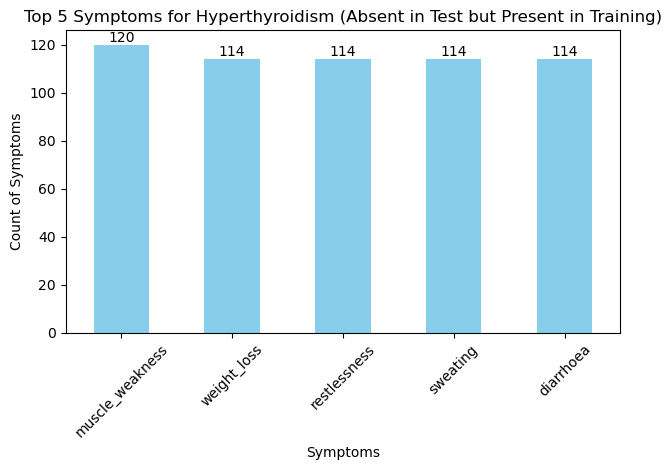

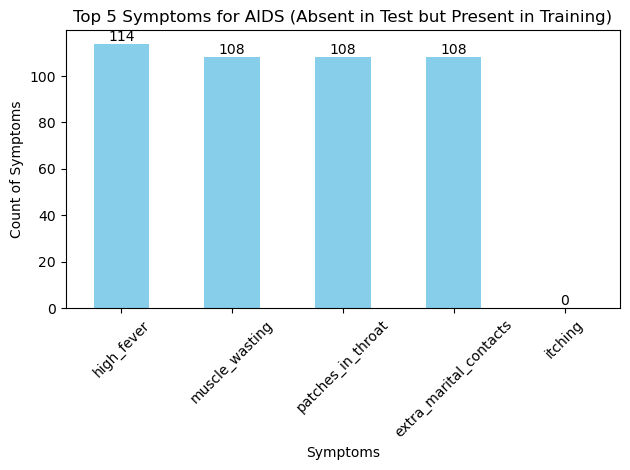

In [134]:
generate_symptom_barchart_from_csv(output_csv_path,training_csv_path,symptoms_csv_path)

In [48]:
output_data = pd.read_csv(output_csv_path)
training_data = pd.read_csv(training_csv_path)
symptoms_data = pd.read_csv(symptoms_csv_path)
training_data = training_data.iloc[:, :-1]

In [49]:
probabilities = output_data.drop(['name', 'age', 'gender'], axis=1).iloc[0]
top_3_diseases = probabilities.nlargest(3).index.tolist()
top_3_diseases

['Hypothyroidism', 'Hyperthyroidism', 'AIDS']

In [50]:
training_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [51]:
training_data[training_data["prognosis"].isin(top_3_diseases)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
4870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism
4885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism


In [52]:
relevant_symptoms = training_data[training_data["prognosis"].isin(top_3_diseases)]

In [53]:
relevant_symptoms.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [54]:
symptom_presence = relevant_symptoms.melt(id_vars=['prognosis'])

In [55]:
symptom_presence

,prognosis,variable,value
0,AIDS,itching,0
1,AIDS,itching,0
2,AIDS,itching,0
3,AIDS,itching,0
4,AIDS,itching,0
...,...,...,...
47515,Hypothyroidism,yellow_crust_ooze,0
47516,Hyperthyroidism,yellow_crust_ooze,0
47517,AIDS,yellow_crust_ooze,0
47518,Hypothyroidism,yellow_crust_ooze,0


In [56]:
symp_list = []
for i in top_3_diseases:
    symp_list.append(symptom_presence[symptom_presence['prognosis']==i])

In [57]:
for j in symp_list

[            prognosis           variable  value
 10     Hypothyroidism            itching      0
 11     Hypothyroidism            itching      0
 12     Hypothyroidism            itching      0
 13     Hypothyroidism            itching      0
 14     Hypothyroidism            itching      0
 ...               ...                ...    ...
 47506  Hypothyroidism  yellow_crust_ooze      0
 47509  Hypothyroidism  yellow_crust_ooze      0
 47512  Hypothyroidism  yellow_crust_ooze      0
 47515  Hypothyroidism  yellow_crust_ooze      0
 47518  Hypothyroidism  yellow_crust_ooze      0
 
 [15840 rows x 3 columns],
              prognosis           variable  value
 20     Hyperthyroidism            itching      0
 21     Hyperthyroidism            itching      0
 22     Hyperthyroidism            itching      0
 23     Hyperthyroidism            itching      0
 24     Hyperthyroidism            itching      0
 ...                ...                ...    ...
 47507  Hyperthyroidism  yellow_c

In [41]:
symptom_aggregate = symptom_presence.groupby('prognosis').sum().reset_index()

C:\Users\Srujana\AppData\Local\Temp\ipykernel_4756\3636094097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  symptom_aggregate = symptom_presence.groupby('prognosis').sum().reset_index()


In [42]:
symptom_aggregate.head()

,prognosis,value
0,AIDS,438.0
1,Hyperthyroidism,1272.0
2,Hypothyroidism,1512.0


In [81]:
def plot_probability_pie_chart(data, color_scheme=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']):
    """
    Plots a pie chart for model probability predictions, highlighting the top three probabilities.
    Parameters:
    - data (DataFrame): DataFrame containing model probability predictions. Assumes the last three columns are non-probability data.
    - color_scheme (list): List of colors for the pie chart segments. Defaults to a set of distinguishable colors.
    Returns:
    - Displays a pie chart.
    """
    # Drop non-probability columns and take the first row if there are multiple
    if data.shape[0] > 1:
        data = data.iloc[0]
    prob_data = data.drop(data.columns[-3:], axis=1)
 
    # Get the top 3 probabilities and sum others
    top_3 = prob_data.iloc[0].nlargest(3)
    others = pd.Series(prob_data.drop(top_3.index, axis =1).sum(), index=['Other'])
 
    # Prepare data for pie chart
    pie_data = pd.concat([top_3, others])
 
    # Plotting
    fig, ax = plt.subplots()
    ax.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=color_scheme)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
 
    plt.title("Top 3 Model Probability Predictions with Distinguishable Colors")
    plt.show()
 

In [82]:
plot_probability_pie_chart(output_data)

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [75]:
prob_data = output_data.drop(['name', 'age', 'gender'], axis=1)

In [76]:
prob_data.head()

,vertigo,AIDS,Acne,Alcoholic_hepatitis,Allergy,Arthritis,Bronchial_Asthma,Cervical_spondylosis,Chicken_pox,Chronic_cholestasis,...,Osteoarthristis,Paralysis__brain_hemorrhage,Peptic_ulcer_diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary_tract_infection,Varicose_veins,hepatitis_A
0,0.0122,0.0125,0.0121,0.0078,0.012,0.0104,0.0092,0.0108,0.0114,0.01,...,0.0111,0.0106,0.0067,0.0073,0.0112,0.0069,0.0088,0.0102,0.0102,0.009


In [84]:
top_3 = prob_data.iloc[0].nlargest(3).index.tolist()

In [86]:
top_3

['Hypothyroidism', 'Hyperthyroidism', 'AIDS']

In [123]:
prob_data.columns

Index(['vertigo', 'AIDS', 'Acne', 'Alcoholic_hepatitis', 'Allergy',
       'Arthritis', 'Bronchial_Asthma', 'Cervical_spondylosis', 'Chicken_pox',
       'Chronic_cholestasis', 'Common_Cold', 'Dengue', 'Diabetes_',
       'Dimorphic_hemmorhoids_piles', 'Drug_Reaction', 'Fungal_infection',
       'GERD', 'Gastroenteritis', 'Heart_attack', 'Hepatitis_B', 'Hepatitis_C',
       'Hepatitis_D', 'Hepatitis_E', 'Hypertension_', 'Hyperthyroidism',
       'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria',
       'Migraine', 'Osteoarthristis', 'Paralysis__brain_hemorrhage',
       'Peptic_ulcer_diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary_tract_infection', 'Varicose_veins', 'hepatitis_A'],
      dtype='object')

In [103]:
# Assuming prob_data is a DataFrame and top_3 is a Series or DataFrame containing the index values to drop
# Drop columns from prob_data based on the index values in top_3
if isinstance(top_3, pd.Series) or isinstance(top_3, pd.DataFrame):
    others = pd.Series(prob_data.drop(top_3.index, axis=1).sum(), index=['Other'])
    print(others)
else:
    print("top_3 should be a Series or DataFrame.")


top_3 should be a Series or DataFrame.


In [127]:
# Assuming prob_data is a DataFrame and top_3 is a list containing the index values to drop
# Drop columns from prob_data based on the index values in top_3
prob_data = pd.to_numeric(prob_data).dropna()

others = pd.Series(prob_data.drop(top_3.index).sum(), index=['Other'])

print(others)


TypeError: arg must be a list, tuple, 1-d array, or Series

In [110]:
top_3_series = pd.Series(top_3)
others_series = pd.Series(others)

# Concatenate the two Series into a single DataFrame
pie_data = pd.concat([top_3_series, others_series])

print(pie_data)

0         Hypothyroidism
1        Hyperthyroidism
2                   AIDS
Other                NaN
dtype: object


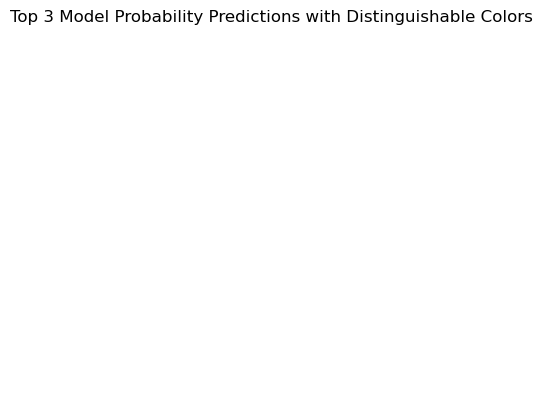

In [122]:
pie_data_numeric_cleaned = pie_data_numeric.dropna()

# Plotting
fig, ax = plt.subplots()
ax.pie(pie_data_numeric_cleaned, labels=pie_data_numeric_cleaned.index, autopct='%1.1f%%', startangle=90, colors=color_scheme)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
 
plt.title("Top 3 Model Probability Predictions with Distinguishable Colors")
plt.show()